<a href="https://colab.research.google.com/github/EstebanBotero03/Senalesysistemas/blob/main/estebitanparcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTEBAN BOTERO OROZCO**
PARCIAL #1
SEÑALES Y SISTEMAS

PUNTO 1

### Importación de librerías necesarias

- `numpy`: para operaciones matemáticas y manejo de arrays.
- `matplotlib.pyplot`: para graficar.
- `cdist` de `scipy.spatial.distance`: para calcular distancias entre vectores (usado en la cuantización).
### Definición de la señal analógica original

Se define una señal compuesta:

\[
x(t) = 20 \sin(7t - \frac{\pi}{2}) - 3 \cos(5t) + 2 \cos(10t)
\]

- `Fo` es la frecuencia fundamental.
- `To` es el período fundamental \( 2\pi \).
- `Fs` es la frecuencia de muestreo (10 veces mayor que la frecuencia fundamental) para cumplir con el criterio de Nyquist.
- `tv` es el vector de tiempo discreto desde 0 hasta dos períodos de la señal.
- `y` es la señal evaluada en los tiempos definidos.
### Aplicación de la función de cero y pendiente

La función `my_ceropen` realiza un escalamiento lineal (normalización con cero y pendiente) de la señal `y`, para que sus valores queden en el rango definido entre `ymin = -3.3` y `ymax = 5`.

Esto es necesario para adaptar la señal al rango de entrada de un conversor A/D.
### Parámetros de cuantización

- `nbits = 5`: se define un convertidor de 5 bits, lo que significa que se puede representar \( 2^5 = 32 \) niveles diferentes.
- `rmin` y `rmax` son los valores mínimo y máximo del rango de cuantización, que deben coincidir con los usados en la normalización.
- `ve` es el vector de niveles de cuantización, generados uniformemente entre `rmin` y `rmax`.
### Cálculo de distancias entre muestras normalizadas y niveles de cuantización

Se usa `cdist` para calcular la **distancia euclidiana** entre cada muestra de la señal `ycs` y cada nivel del vector `ve`.

- `ycs.reshape(-1, 1)`: convierte el vector de muestras a una columna (necesario para `cdist`).
- `ve.reshape(-1, 1)`: convierte el vector de niveles de cuantización a una columna.

Esto permite determinar qué nivel está más cerca de cada muestra.


In [75]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# señal original
Fo = 1/(2*np.pi)
To = 2*np.pi
Fs = 10 * np.pi  # asegurar Nyquist
Ts = 1 / Fs
tv = np.arange(0, 2 * To, Ts)  # procesar dos periodos discretizados
y = 20 * np.sin(7 * tv - np.pi/2) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

# cero y pendiente
ycs = my_ceropen(y, ymin=-3.3,ymax=5)

# número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 5
ve = np.linspace(rmin, rmax, 2**nbits)  # 32 niveles uniformes

# distancias y cero pendiente a vector de cuantización
d = cdist(ycs.reshape(-1, 1), ve.reshape(-1, 1))  # reshape para vectores columna
d.shape  # d es una matriz con distancias entre cada muestra y cada nivel de cuantización


(395, 32)

### Identificación del nivel de cuantización más cercano

- `np.argmin(d, axis=1)` devuelve, para cada muestra, el índice del nivel de cuantización más cercano.
- `axis=1` indica que se busca el valor mínimo a lo largo de las **columnas** de la matriz `d`, es decir, se busca el nivel (`ve[j]`) más cercano a cada muestra (`ycs[i]`).

El resultado `ind` es un vector de índices que indica qué nivel de `ve` se asigna a cada muestra para formar la señal cuantizada.


In [76]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para generar señal cuantizada
ind = np.argmin(d, axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind


array([ 1,  1,  2,  3,  5,  7, 10, 13, 16, 19, 21, 24, 26, 28, 29, 29, 29,
       28, 26, 24, 21, 18, 15, 12,  9,  6,  4,  2,  1,  1,  1,  2,  4,  7,
       10, 13, 16, 19, 21, 24, 25, 26, 27, 26, 25, 24, 22, 19, 17, 14, 12,
        9,  7,  6,  5,  4,  4,  4,  6,  7,  9, 11, 13, 15, 18, 20, 22, 24,
       25, 26, 26, 26, 25, 24, 23, 20, 18, 15, 13, 10,  7,  5,  3,  1,  0,
        0,  1,  2,  4,  6,  9, 12, 16, 19, 23, 26, 28, 30, 31, 31, 30, 29,
       27, 24, 21, 17, 14, 10,  7,  5,  2,  1,  0,  0,  1,  2,  4,  6,  9,
       12, 14, 17, 20, 22, 24, 25, 26, 26, 26, 25, 24, 23, 21, 19, 16, 14,
       12, 10,  8,  6,  5,  4,  4,  4,  5,  7,  8, 11, 13, 16, 18, 21, 23,
       25, 26, 27, 27, 26, 24, 22, 20, 17, 14, 11,  8,  5,  3,  2,  1,  1,
        1,  3,  5,  8, 11, 14, 17, 20, 23, 25, 27, 28, 29, 29, 28, 27, 25,
       22, 20, 17, 14, 11,  8,  6,  4,  2,  1,  1,  1,  2,  3,  4,  7,  9,
       12, 15, 17, 20, 23, 25, 27, 28, 29, 29, 28, 27, 25, 22, 19, 16, 13,
       10,  7,  4,  2,  1

### Verificación del nivel de cuantización asignado a una muestra específica

Esta línea imprime:

- `ycs[1]`: el valor normalizado de la segunda muestra de la señal (recordando que los índices inician en 0).
- `ind[1]`: el índice del nivel de cuantización más cercano a `ycs[1]`, obtenido previamente con `np.argmin`.
- `ve[ind[1]]`: el valor real del nivel cuantizado asignado a `ycs[1]`.

Esto permite verificar que el proceso de cuantización asigna correctamente el nivel más cercano a cada muestra.


In [77]:
print(ycs[1], ind[1], ve[ind[1]])  # para ycs[1], el nivel cuantizado más cercano es ve[ind[1]]


-2.9888445908669117 1 -3.032258064516129


### Función `my_cuantizador`: Cuantización de un solo valor

Esta función toma un valor y lo cuantiza al nivel más cercano en un conjunto de niveles predefinidos.

#### Parámetros:
- `yn`: valor numérico a cuantizar (escalar).
- `vq`: vector de niveles de cuantización (por ejemplo, `ve` con 32 niveles uniformes).

#### Proceso interno:
1. `vq.shape[0]`: obtiene el número total de niveles.
2. `yn.reshape(-1, 1)` y `vq.reshape(-1, 1)`: convierten los valores en vectores columna para usarlos con `cdist`.
3. `cdist(...)`: calcula la distancia entre `yn` y cada nivel de `vq`.
4. `np.argmin(dn)`: encuentra el índice del nivel más cercano.
5. `vq[ind]`: retorna el valor cuantizado correspondiente al índice más cercano.

Esta función se puede usar dentro de un bucle para cuantizar una señal muestra por muestra.


In [78]:
#función cuantización punto a punto

def my_cuantizador(yn, vq):  # yn punto a cuantizar, vq vector de niveles de cuantización
  Ne = vq.shape[0]  # tamaño del vector de niveles
  dn = cdist(yn.reshape(-1,1), vq.reshape(-1,1))  # distancia entre el punto y los niveles
  ind = np.argmin(dn)  # posición del nivel más cercano
  return vq[ind]


### Cuantización de toda la señal mediante recorrido muestra por muestra

Se recorre el vector `ycs` (la señal normalizada con cero y pendiente) para cuantizar cada una de sus muestras.

#### Paso a paso:
- Se utiliza un bucle `for` para iterar sobre cada muestra de `ycs`.
- En la primera iteración (`i == 0`), se inicializa el vector `yq` con la primera muestra cuantizada.
- En las siguientes iteraciones (`i > 0`), se usa `np.append` para ir acumulando las muestras cuantizadas en el vector `yq`.

> Nota: Este método es didáctico pero **no es el más eficiente** computacionalmente. Para señales largas, es mejor usar una versión vectorizada.


In [79]:
#recorrer vector cero y pendiente discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i == 0:  # primera muestra
     yq = my_cuantizador(ycs[i], ve)
   else:
     yq = np.append(yq, my_cuantizador(ycs[i], ve))  # apilar datos cuantizados si i > 0


### Visualización del proceso completo de digitalización

Esta gráfica muestra todas las etapas clave del proceso de conversión de una señal analógica a digital:

- `plt.plot(tv, ycs, c='r', label='ycs')`: traza la señal continua acondicionada (`ycs`) en rojo.
- `plt.stem(tv, ycs, label='ycs_dis')`: representa las muestras discretas de la señal acondicionada, con líneas y marcadores, simulando la muestreo temporal.
- `for v in ve: ...`: se dibujan líneas horizontales para cada uno de los niveles de cuantización definidos en `ve`. Estas líneas representan los posibles estados de cuantización que puede tomar la señal digital.
- `plt.plot(tv, yq, c='y', marker='o', label='ydig', linewidth=2)`: representa la señal digital resultante (`yq`), es decir, cuantizada y discretizada. Se muestra en color amarillo con círculos marcando los puntos cuantizados.

#### Detalles adicionales:
- `plt.legend()`: agrega una leyenda para identificar cada señal.
- `plt.grid()`: muestra una cuadrícula para facilitar la lectura.
- `plt.xlabel('t') / plt.ylabel('Amplitud')`: etiquetas de los ejes.
- `plt.show()`: despliega la figura final.

Este gráfico ilustra claramente cómo se transforma una señal continua en una señal digital mediante acondicionamiento, muestreo y cuantización.


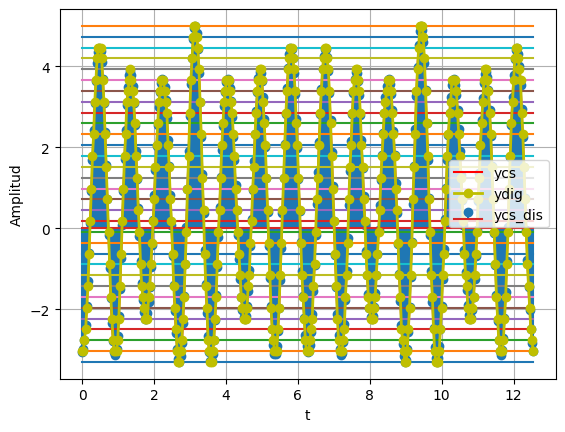

In [80]:
#graficar señales

plt.plot(tv, ycs, c='r', label='ycs')  # señal continua acondicionada

plt.stem(tv, ycs, label='ycs_dis')  # señal acondicionada discreta

# estados de cuantización

for v in ve:
  plt.plot(tv, v*np.ones(len(tv)))  # líneas de niveles de cuantización

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv, yq, c='y', marker='o', label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()


PUNTO 2 SIN CONVERSOR

### Importación de librerías necesarias

- `numpy`: se usa para operaciones matemáticas y manipulación de arreglos numéricos.
- `matplotlib.pyplot`: se utiliza para crear gráficos y visualizar señales.
- `scipy.signal.convolve`: permite aplicar operaciones de convolución, útiles por ejemplo para filtros digitales o reconstrucción de señales.
- `scipy.spatial.distance.cdist`: calcula matrices de distancias entre dos conjuntos de vectores, fundamental en el proceso de cuantización para determinar el nivel más cercano a cada muestra.


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist


### Visualización de la señal original continua x(t)

Este bloque genera y grafica la señal analógica compuesta:

\[
x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)
\]

#### Detalles del código:
- `t = np.linspace(0, 0.006, 10000)`: genera un vector de tiempo desde 0 hasta 6 ms, con 10,000 muestras, para una resolución temporal fina.
- `x_t`: define la señal combinando tres componentes sinusoidales con diferentes frecuencias y amplitudes.
- `plt.plot(...)`: grafica la señal en función del tiempo.
- Se agregan título, etiquetas de ejes, cuadrícula y leyenda para interpretar correctamente la gráfica.

Esta señal es continua y se usará como base para analizar el efecto de la muestreo y cuantización en el proceso de conversión a digital.


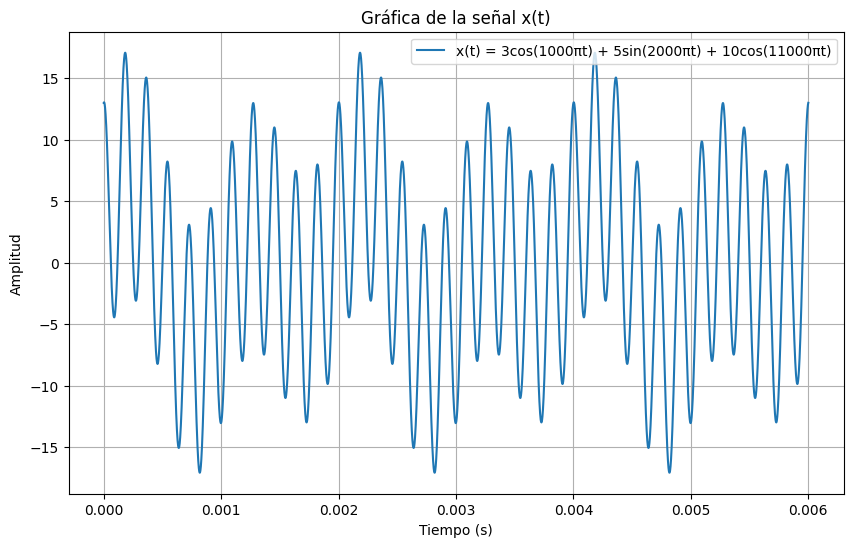

In [93]:
# Se grafica la señal original
t = np.linspace(0, 0.006, 10000)  # Se define t y damos valor al intervalo de tiempo a graficar

# Se define x_t como la señal a trabajar
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Se grafica la señal x(t)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(t, x_t, label='x(t) = 3cos(1000πt) + 5sin(2000πt) + 10cos(11000πt)')  # Agregar leyenda
plt.title('Gráfica de la señal x(t)')  # Título de la gráfica
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### Función `muestrear_y_graficar`: Muestreo y visualización de una señal

Esta función permite simular el muestreo de una señal continua y graficar su versión discretizada en el dominio del tiempo.

#### Parámetros:
- `fs`: frecuencia de muestreo en Hz (por ejemplo, 5000 para 5 kHz).
- `duracion`: duración total de la señal en segundos (por defecto, 6 ms).
- `titulo`: texto para el título de la gráfica generada.

#### Dentro de la función:
- `T = 1/fs`: se calcula el período de muestreo.
- `t = np.arange(0, duracion, T)`: se crea un vector de tiempo con pasos iguales al período de muestreo, simulando los instantes en los que se toman las muestras.
- Se genera la señal muestreada evaluando \( x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t) \) en esos puntos discretos.
- `plt.stem(...)`: se utiliza para graficar la señal de forma discreta (líneas verticales con marcadores).

Esta función es útil para estudiar los efectos de diferentes frecuencias de muestreo sobre la representación de la señal original.


In [83]:
# Se crea una función para muestrear y graficar nuestra señal
def muestrear_y_graficar(fs, duracion=0.006, titulo=''):
    """
    Muestra y grafica la señal x_t, utilizando la frecuencia de muestreo de 5kHz.

    Especificación de los parámetros:
    - fs: Frecuencia de muestreo en Hz.
    - duracion: Duración de la señal en segundos para la simulación.
    - titulo: Título para la gráfica de la señal.
    """

    T = 1/fs   # Periodo de muestreo
    t = np.arange(0, duracion, T)  # Vector de tiempo

    # Señal
    x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

    # Gráfica de la señal muestreada
    plt.figure(figsize=(10, 6))
    plt.stem(t, x_t, linefmt='b-', markerfmt="bo", basefmt="k")
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()


### Muestreo y gráfica de la señal a 5 kHz

Se llama a la función `muestrear_y_graficar` con una frecuencia de muestreo de 5000 Hz para obtener la señal discretizada y mostrar su gráfica correspondiente.

Esto permite visualizar cómo la señal original es representada mediante muestras tomadas cada 0.2 ms.


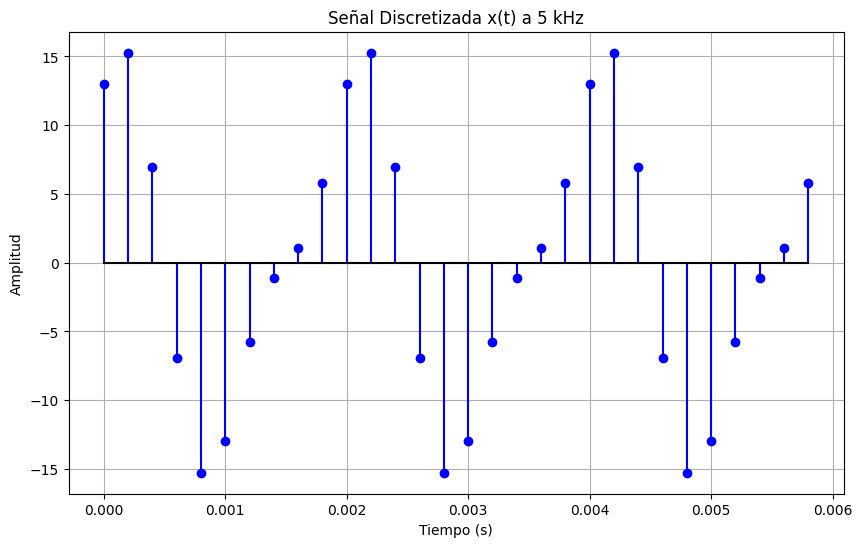

In [84]:
# Se grafica la señal muestreada a 5KHz
muestrear_y_graficar(5000, titulo='Señal Discretizada x(t) a 5 kHz')


# Como la frecuencia de muestreo de 5KHz no es la adecuada para la señal dada, porque esta es menor que el doble de la frecuencia más alta de la señal (5500Hz), por lo cual es necesario para evitar el aliasing según el teorema de Nyquist
# Dado lo anterior entonces asignamos un nuevo valor para fs, en este caso utilizamos 11 kHz

muestrear_y_graficar(11000, titulo='Señal Discretizada x(t) a 11 kHz')

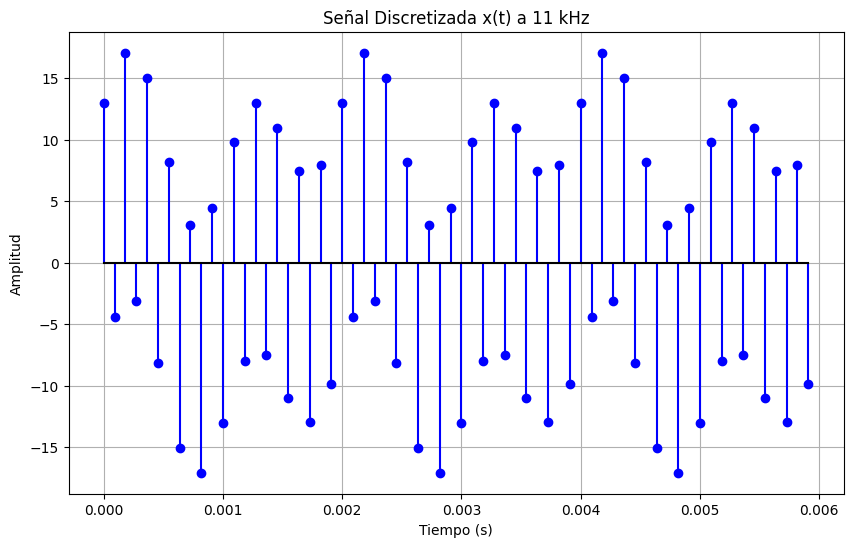

In [105]:
muestrear_y_graficar(11000, titulo='Señal Discretizada x(t) a 11 kHz')


PUNTO 3

#### Explicación del código para calcular la distancia media entre dos señales

Este código calcula una medida que nos indica qué tan diferentes son dos señales a lo largo del tiempo, usando la potencia media y el límite cuando el periodo tiende a infinito.

1. Primero definimos variables simbólicas:
   - $T_0$: el período total de la señal.
   - $t$: la variable de tiempo.
   - $A$: la amplitud de la señal cosenoidal.

2. Calculamos la frecuencia angular como:
   
$$
\omega_0 = \frac{2\pi}{T_0}
$$

3. Definimos una función llamada `potencia_media` que calcula la integral del cuadrado de una señal en un intervalo dado, esto representa la potencia media en ese intervalo.

4. Definimos dos señales:
   - $x_1(t) = A \cos(\omega_0 t)$, una señal cosenoidal.
   - $x_2(t)$, una señal definida por partes que vale 1 en el primer cuarto del periodo, -1 en la mitad siguiente, y 1 en el último cuarto.

5. Calculamos la potencia media de cada señal en un período completo $[0, T_0]$ usando la función `potencia_media`.

6. Calculamos la potencia cruzada entre ambas señales integrando el producto $x_1(t) x_2(t)$ en el mismo intervalo. Esto mide la similitud entre ambas señales.

7. Finalmente, calculamos la distancia media entre las señales como:

$$
d = \lim_{T_0 \to \infty} \frac{1}{T_0} \int_0^{T_0} |x_1(t) - x_2(t)|^2 dt = \lim_{T_0 \to \infty} \left(P_{x_1} + P_{x_2} - 2 \times \text{potencia cruzada} \right)
$$

Esta fórmula nos da un valor que representa cuán distintas son las dos señales en promedio a lo largo del tiempo.

El código usa la librería SymPy para calcular todas estas integrales y límites simbólicamente.

Así podemos obtener una medida matemática precisa de la diferencia entre estas dos señales en todo su dominio temporal.




In [91]:
from sympy import Symbol, limit, oo

# Declarar los símbolos
T0, t, A = sp.symbols('T0 t A', real=True)

# Definir la frecuencia angular
W0 = (2 * sp.pi) / T0

# Definir la función para calcular la potencia media
def potencia_media(x, lM, lm):
    P = sp.integrate(x**2, (t, lM, lm))
    return P

# señales

x1= A*sp.cos(W0 * t)

x2_1= 1
x2_2= -1
x2_3 = 1


# Calcular la potencia media de la señal
Px1 = (1/T0)*potencia_media(x1, 0, T0)
print(Px1)

Px2=(1/T0)*( potencia_media(x2_1,0,T0/4) + potencia_media(x2_2, T0/4 , 3*T0/4 ) + potencia_media(x2_3,3*T0/4,T0) )
print(Px2)

x1_2= -(2/T0)*(sp.integrate(x1*x2_1, (t,0,T0/4)) + sp.integrate(x1*x2_2, (t,T0/4 , 3*T0/4)) + sp.integrate(x1*x2_3, (t,3*T0/4,T0)))
print(x1_2)

# Distancia de las dos señales

dx1_x2= sp.limit(Px1 + Px2 + x1_2, T0, oo )
print(dx1_x2)


A**2/2
1
-4*A/pi
A**2/2 - 4*A/pi + 1


PUNTO 4

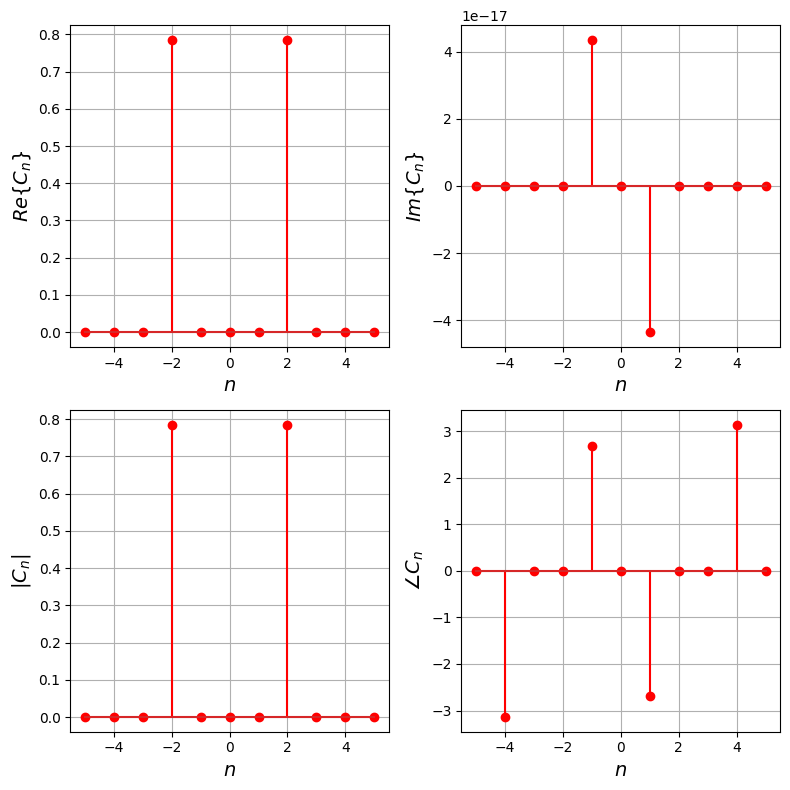

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
N = 5                   # Número de armónicos
nv = np.linspace(-N, N, 2*N+1)  # vector num armónicos
T = 4                   # Periodo
w0 = 2*np.pi / T        # Frecuencia fundamental
A = 1                   # Amplitud de la señal
d1 = 0.5                # Primer cambio de pendiente
d2 = 1.5                # Segundo cambio de pendiente
alpha = A / (d2 - d1)   # Pendiente de la rampa

# Calcular espectro Cn para x''(t)
Cn = np.zeros(2*N+1,dtype=np.complex128)
for k, n in enumerate(nv):
    if n != 0:
        Cn[k] = (alpha * (np.exp(-1j * n * w0 * d1) - np.exp(-1j * n * w0 * d2)
                        + np.exp(1j * n * w0 * d2) - np.exp(1j * n * w0 * d1))) * (1j * w0) / (T * n)
    else:
        Cn[k] = 0  # nivel DC C_0

# Graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\angle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()
plt.show()
